In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from rdkit import Chem
import pandas as pd
from predict_tautomer import get_taut_data
import mols2grid

from taut_src.rank_tautomer import predict_by_smis

# 1. Predicting Favorable Tautomeric States using Energetic Information

In [3]:
def construct_data(out_data, show_high=True):
    new_data = []
    for info in out_data:
        if not show_high:
            if info["label"] == "high_energy":
                continue
        new_data.append([Chem.MolFromSmiles(info["tsmi"]), info["tsmi"], info["score"], info["label"]])
    df_data = pd.DataFrame(new_data)
    df_data.columns = ["tmol", "tsmi", "score", "label"]
    return df_data

In [4]:
energy_cutoff = 2.76
cutmol = False
num_confs = 100
ionization=False
ph = 7.0
tph = 1.0

In [5]:
smi = 'Cn1c(=O)c2[nH]cnc2n(C)c1=O'
smi = 'Cc1c2c([nH]n1)OC(=C([C@@]2(c3cc(cc(c3)N4CCCC4)C(F)(F)F)C(C)C)C#N)N'

smi = 'O=C(O)c1cncc(O)n1'
smi = "C=CO"

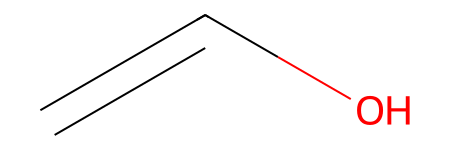

In [6]:
mol = Chem.MolFromSmiles( smi )
mol

In [7]:
data = get_taut_data(smi, cutmol, num_confs, energy_cutoff, ionization, ph, tph)

[tauts(smi='CC=O', smirks=['8_PT_06_00'], mol=<rdkit.Chem.rdchem.Mol object at 0x15545313e110>), tauts(smi='C=CO', smirks=['9_PT_06_00', 'self'], mol=<rdkit.Chem.rdchem.Mol object at 0x15545313e3b0>)]
tauts done
      0    1
0  CC=O  0.0
      0         1     2
1  C=CO  9.064488  C=CO


In [8]:
df = construct_data(data, show_high=True)

In [9]:
df.head()

,tmol,tsmi,score,label
0,<rdkit.Chem.rdchem.Mol object at 0x15545313e2d0>,CC=O,0.0,low_energy
1,<rdkit.Chem.rdchem.Mol object at 0x15545313e6c0>,C=CO,9.06,high_energy


In [10]:
mols2grid.display(df, 
                  mol_col="tmol", 
                  subset=["img", "score", "label"], 
                  n_cols=3, 
                  size=(200, 200))

MolGridWidget()

# 2. Predicting Relative Energy for Tautomer list 

In [3]:
tsmis = ["O=C(O)c1cncc(=O)[nH]1", "O=C(O)c1cncc(O)n1", "O=C1C=NCC(C(=O)O)=N1", "O=C1CN=CC(C(=O)O)=N1"]

In [8]:
output = predict_by_smis(tsmis, num_confs=50)

In [9]:
df = pd.DataFrame(output, columns=["idx", "smiles", "relative-energies"])

In [10]:
df.head()

,idx,smiles,relative-energies
0,0,O=C(O)c1cncc(=O)[nH]1,0.000000
1,1,O=C(O)c1cncc(O)n1,1.909498
2,2,O=C1C=NCC(C(=O)O)=N1,12.095061
3,3,O=C1CN=CC(C(=O)O)=N1,13.008593
